In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #used for slightly fancier plots
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from google.colab import files
import io

uploaded = files.upload()

train = pd.read_csv(io.BytesIO(uploaded['train_cleaned.csv']), sep=',')



Saving train_cleaned.csv to train_cleaned.csv


In [3]:
train.describe()

,Survived,Pclass,Sex,Age_band,Family_Size,Fare_cat,C,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,1.439955,0.904602,1.505051,0.188552,0.725028
std,0.486592,0.836071,0.477990,0.842373,1.613459,1.118148,0.391372,0.446751
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,4.000000,10.000000,3.000000,1.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age_band       891 non-null int64
Family_Size    891 non-null int64
Fare_cat       891 non-null int64
C              891 non-null int64
S              891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


In [5]:
from sklearn import preprocessing

scaler  = preprocessing.StandardScaler(copy=True)

train_std = scaler.fit_transform(X=train.iloc[:,1:], y=train.iloc[:,0])

train_std

array([[ 0.82737724, -0.73769513, -0.52257377, ..., -1.34677659,
        -0.48204268,  0.61583843],
       [-1.56610693,  1.35557354,  0.66521508, ...,  1.33773782,
         2.0745051 , -1.62380254],
       [ 0.82737724,  1.35557354, -0.52257377, ..., -0.45193845,
        -0.48204268,  0.61583843],
       ...,
       [ 0.82737724,  1.35557354, -0.52257377, ...,  0.44289968,
        -0.48204268,  0.61583843],
       [-1.56610693, -0.73769513, -0.52257377, ...,  0.44289968,
         2.0745051 , -1.62380254],
       [ 0.82737724, -0.73769513, -0.52257377, ..., -1.34677659,
        -0.48204268, -1.62380254]])

In [6]:
print("Mean :", train_std[:,0].mean())
print("Std Dev :", train_std[:,0].std())


Mean : -8.77213254024815e-17
Std Dev : 0.9999999999999999


In [7]:
train_std.shape #this is our training dataset

(891, 7)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train_std, train.iloc[:,0], test_size=.2)

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [10]:
#by defualt COLab uses version one of Tensorflow, but we'll migrate to V2.x
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

#Start by creating network object
network = models.Sequential()

In [0]:
network.add(layers.Dense(units=16,activation='elu', input_shape=(7,))) #first layer

In [0]:
network.add(layers.Dense(units=14, activation='elu')) #hidden layer 2
network.add(layers.Dense(units=12, activation='elu')) #hidden layer 3
network.add(layers.Dense(units=10, activation='elu')) #hidden layer 1

In [0]:
network.add(layers.Dense(units=1, activation='sigmoid')) # output layer

In [0]:
# from tensorflow.keras.utils import 

In [0]:
nag = optimizers.SGD(momentum=.9, nesterov=True)
sgd = optimizers.SGD(momentum=.9)

In [0]:
network.compile(optimizer=nag, loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
history = network.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=1)

Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 1s 2ms/sample - loss: 0.5897 - accuracy: 0.6798 - val_loss: 0.5063 - val_accuracy: 0.7263
Epoch 2/20
712/712 [==============================] - 0s 161us/sample - loss: 0.4574 - accuracy: 0.7893 - val_loss: 0.4849 - val_accuracy: 0.7430
Epoch 3/20
712/712 [==============================] - 0s 138us/sample - loss: 0.4386 - accuracy: 0.8048 - val_loss: 0.4849 - val_accuracy: 0.7598
Epoch 4/20
712/712 [==============================] - 0s 148us/sample - loss: 0.4290 - accuracy: 0.8188 - val_loss: 0.4756 - val_accuracy: 0.7709
Epoch 5/20
712/712 [==============================] - 0s 135us/sample - loss: 0.4227 - accuracy: 0.8118 - val_loss: 0.4713 - val_accuracy: 0.7709
Epoch 6/20
712/712 [==============================] - 0s 169us/sample - loss: 0.4225 - accuracy: 0.8174 - val_loss: 0.4659 - val_accuracy: 0.7765
Epoch 7/20
712/712 [==============================] - 0s 145us/sample - loss: 0.

In [19]:
predictions = network.predict(X_test[10:14,:])
print(predictions)
print(Y_test[10:14])

[[0.9007958 ]
 [0.5577107 ]
 [0.04959466]
 [0.9689284 ]]
161    1
505    0
13     0
556    1
Name: Survived, dtype: int64


In [0]:
#Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

#Create count of the number of epochs 
epoch_count = range(1, len(training_loss) + 1)

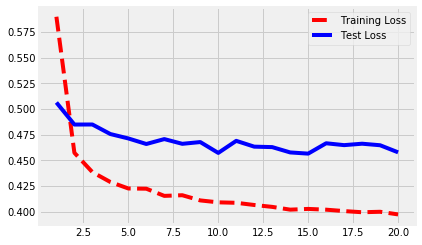

In [21]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel=("Epoch")
plt.ylabel=("Loss")
plt.show()

In [0]:
training_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]

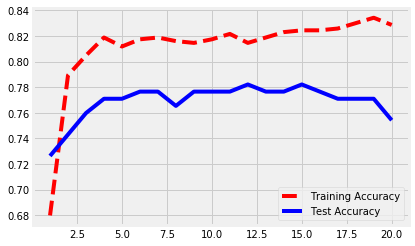

In [26]:
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel = ("Epoch")
plt.ylabel = ("Accuracy Score")
plt.show()

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2), ModelCheckpoint(filepath="bestmodel.h5", monitor="val_loss", save_best_only=True)]

In [32]:
history = network.fit(x=X_train, y=Y_train, epochs=100, callbacks=callbacks, batch_size=10, validation_data=(X_test, Y_test))

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 453us/sample - loss: 0.4133 - accuracy: 0.8258 - val_loss: 0.4817 - val_accuracy: 0.7821
Epoch 2/100
712/712 [==============================] - 0s 440us/sample - loss: 0.4093 - accuracy: 0.8216 - val_loss: 0.4652 - val_accuracy: 0.7821
Epoch 3/100
712/712 [==============================] - 0s 391us/sample - loss: 0.4134 - accuracy: 0.8329 - val_loss: 0.4691 - val_accuracy: 0.7765
Epoch 4/100
712/712 [==============================] - 0s 424us/sample - loss: 0.4143 - accuracy: 0.8230 - val_loss: 0.4522 - val_accuracy: 0.7542
Epoch 5/100
712/712 [==============================] - 0s 405us/sample - loss: 0.4128 - accuracy: 0.8202 - val_loss: 0.4662 - val_accuracy: 0.7709
Epoch 6/100
712/712 [==============================] - 0s 388us/sample - loss: 0.4035 - accuracy: 0.8287 - val_loss: 0.4653 - val_accuracy: 0.7654


In [0]:
network_drop = models.Sequential()
network_drop.add(layers.Dropout(.2, input_shape=(7,)))

In [0]:
network_drop.add(layers.Dense(units=14, activation='elu')) #hidden layer 2
network_drop.add(layers.Dropout(.2))
network_drop.add(layers.Dense(units=12, activation='elu')) #hidden layer 3
network_drop.add(layers.Dropout(.2))
network_drop.add(layers.Dense(units=10, activation='elu')) #hidden layer 1
network_drop.add(layers.Dropout(.2))

network_drop.add(layers.Dense(units=1, activation='sigmoid')) # output layer

In [0]:
network_drop.compile(optimizer=nag, loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history_drop = network_drop.fit(x=X_train, y=Y_train, epochs=20, validation_data=(X_test, Y_test), verbose=1)

Train on 712 samples, validate on 179 samples
Epoch 1/20
712/712 [==============================] - 1s 1ms/sample - loss: 0.6955 - accuracy: 0.5323 - val_loss: 0.6711 - val_accuracy: 0.5587
Epoch 2/20
712/712 [==============================] - 0s 150us/sample - loss: 0.6418 - accuracy: 0.6419 - val_loss: 0.6483 - val_accuracy: 0.5642
Epoch 3/20
712/712 [==============================] - 0s 158us/sample - loss: 0.6168 - accuracy: 0.6699 - val_loss: 0.6027 - val_accuracy: 0.7039
Epoch 4/20
712/712 [==============================] - 0s 153us/sample - loss: 0.5962 - accuracy: 0.6868 - val_loss: 0.5702 - val_accuracy: 0.7318
Epoch 5/20
712/712 [==============================] - 0s 133us/sample - loss: 0.5854 - accuracy: 0.7219 - val_loss: 0.5596 - val_accuracy: 0.7486
Epoch 6/20
712/712 [==============================] - 0s 127us/sample - loss: 0.5873 - accuracy: 0.6896 - val_loss: 0.5466 - val_accuracy: 0.7486
Epoch 7/20
712/712 [==============================] - 0s 149us/sample - loss: 0.